In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data=pd.read_csv("transformed_housing_data_2.csv")
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


## simple mean prediction model:

In [3]:
data["mean_sales"]=data['Sale_Price'].mean()
data["mean_sales"].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

## visualizing the model:

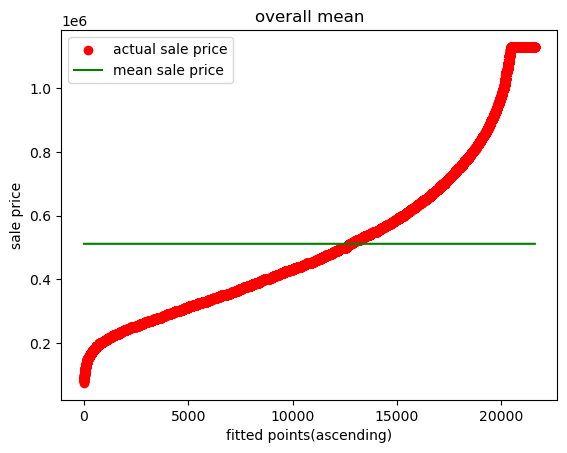

In [4]:
plt.figure(dpi=100)
k=range(0,len(data))
plt.scatter(k,data["Sale_Price"].sort_values(),color="red",label="actual sale price")
plt.plot(k,data["mean_sales"].sort_values(),color="green",label="mean sale price")
plt.xlabel("fitted points(ascending)")
plt.ylabel("sale price")
plt.title("overall mean")
plt.legend()

## Improving model: second model

In [5]:
#calculaitng average sale price with respect to overall garde of the house
import numpy as np

In [6]:
grade_mean=data.pivot_table(values="Sale_Price",columns=["Overall Grade"],aggfunc=np.mean)

In [7]:
grade_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [8]:
#creating a new column
data["grade_mean"] = 0

#for every grade fill its mean price in it
for i in grade_mean.columns:
    data["grade_mean"][data["Overall Grade"] == i] = grade_mean[i][0]
data["grade_mean"].head()

C:\Users\vishvajeet\AppData\Local\Temp\ipykernel_23624\2097982889.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["grade_mean"][data["Overall Grade"] == i] = grade_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [9]:
#plotting for comparing the models with different overall grade:

In [10]:
z=0

gradewise_list=[]
for i in range(1,11):
    k=data["Sale_Price"][data["Overall Grade"]==i]
    gradewise_list.append(k)


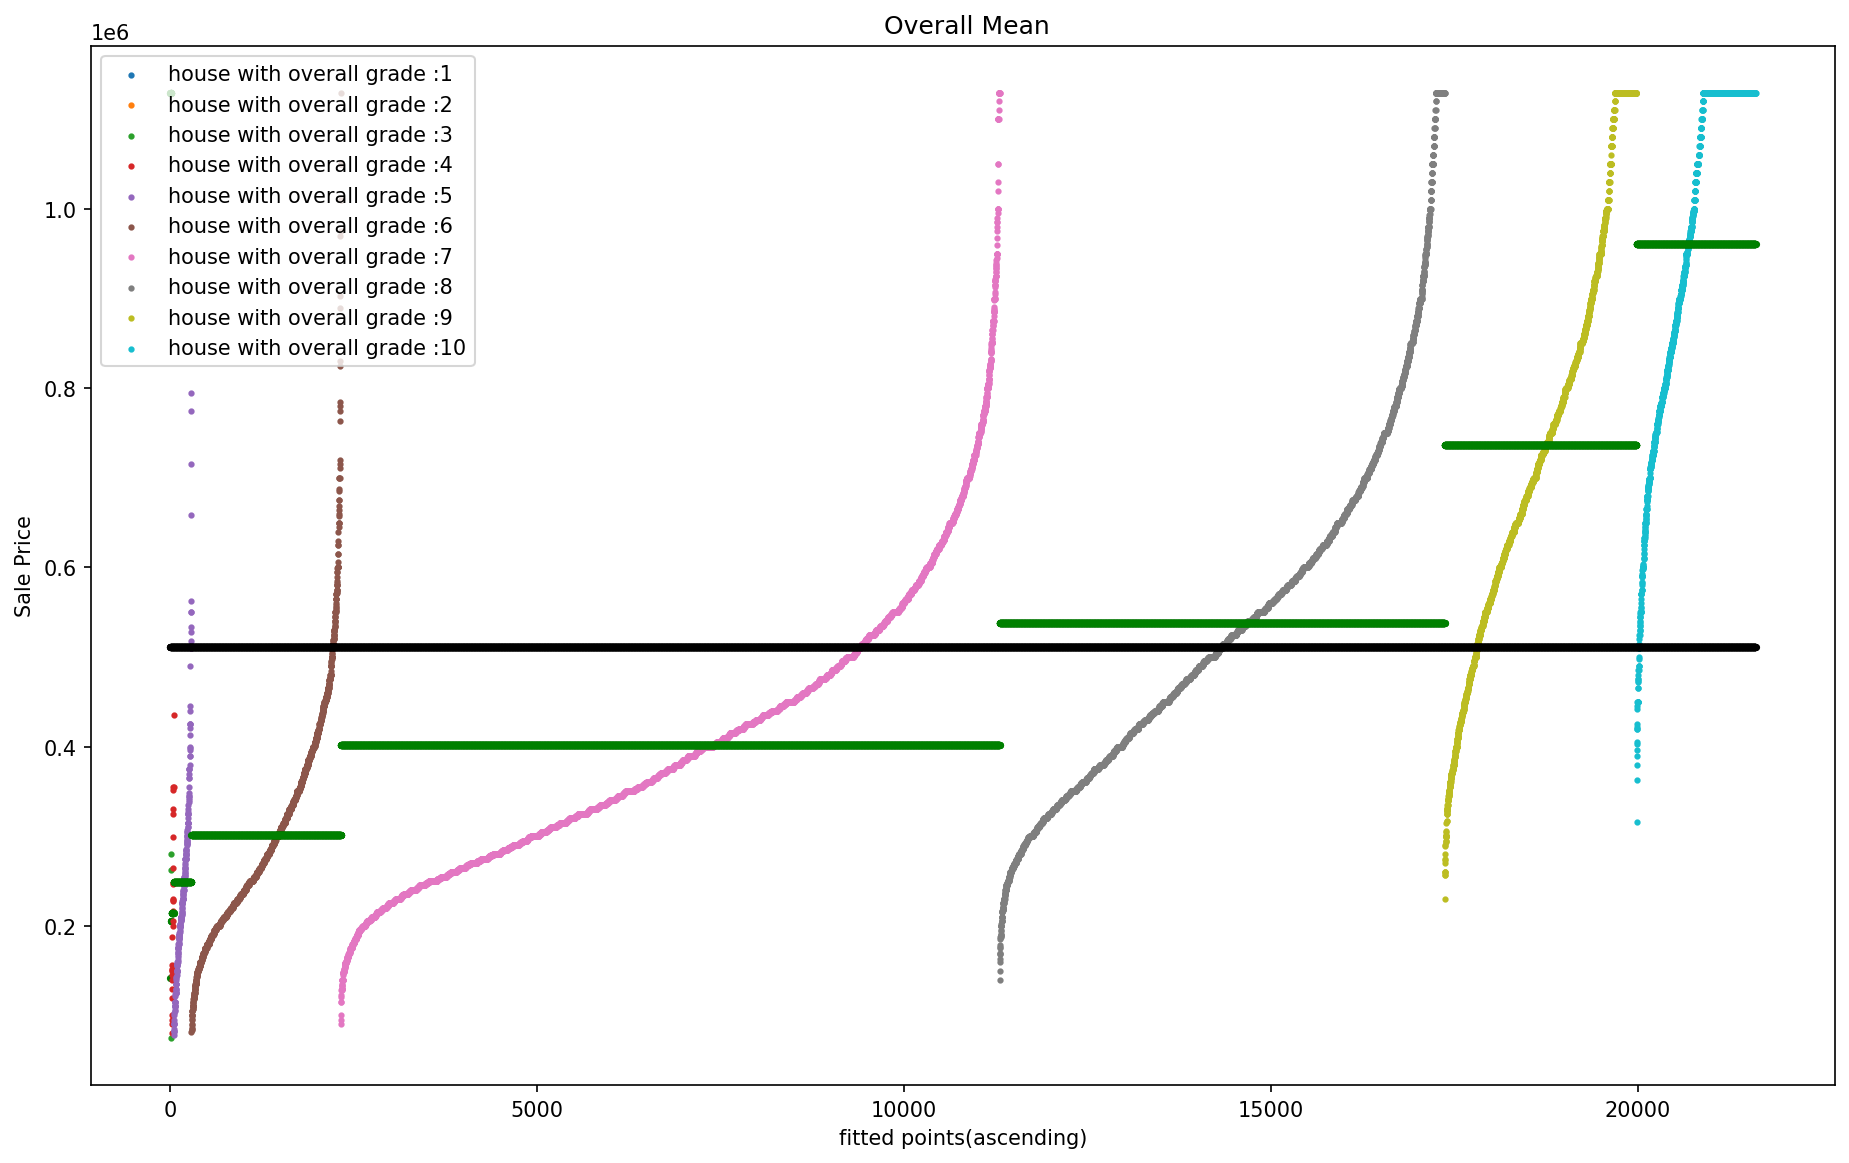

In [11]:
plt.figure(dpi=150,figsize=(15,9))

#plotting "sale price" wrt gradewise##
#z varibale is for X axis

z=0

for i in range(1,11):
    #defining x axis using z
    points=[k for k in range(z,z + len(gradewise_list[i-1]))]
    
    #plotting
    plt.scatter(points,gradewise_list[i-1].sort_values(),label=f"house with overall grade :{i}",s=4)
    
    #plotting gradewise mean:
    plt.scatter(points,[gradewise_list[i-1].mean() for q in range(len(gradewise_list[i-1]))],s=6,color="green")
    
    z=max(points)+1

    #plotting overall mean:
plt.scatter([q for q in range(0,z)],data["mean_sales"],s=6,color="black")

plt.xlabel("fitted points(ascending)")
plt.ylabel("Sale Price")
plt.title(" Overall Mean")
plt.legend()


# this method is complecated we another method for comapring graphs:

# Residual Plots:

In [12]:
#residual plots =prediction - actual
#a residual plot is a scatter plot of difference between prediction and actual

In [13]:
mean_difference=data["mean_sales"]-data["Sale_Price"]
grade_mean_difference=data["grade_mean"]-data["Sale_Price"]

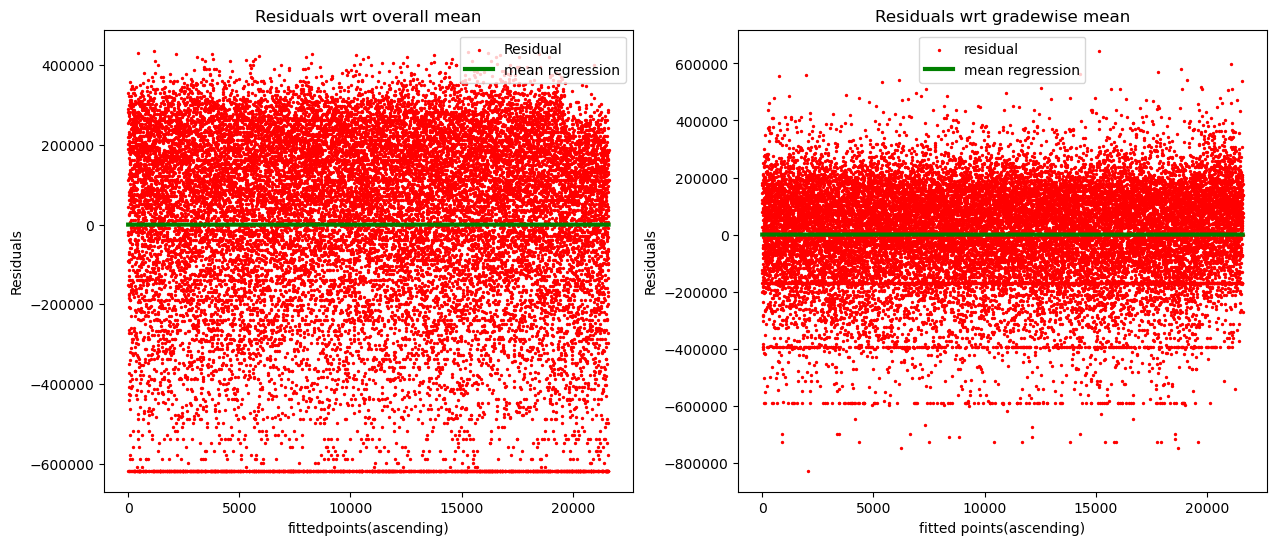

In [14]:
#plotting residual plot:

plt.figure(dpi=100,figsize=(15,6))

k=range(0,len(data))
l=[0 for i in range(len(data))]

#plotting residual for mean difference

plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color="red",label="Residual",s=2)
plt.plot(k,l,label="mean regression",color="green",linewidth=3)
plt.xlabel('fittedpoints(ascending)')
plt.ylabel("Residuals")
plt.title("Residuals wrt overall mean")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(k,grade_mean_difference,color="red",label="residual",s=2)
plt.plot(k,l,label="mean regression",color="green",linewidth=3)
plt.xlabel("fitted points(ascending)")
plt.ylabel("Residuals")
plt.title("Residuals wrt gradewise mean")
plt.legend()


#zero line shows ideal model
#from above plot we got that 2nd plot residuals are closer to zero line
#that shows that mean regression model based on categorical varible will give better results

# Model Evaluation matrices:

# Mean Error:

In [15]:
cost=sum(mean_difference)/len(data)
print(round(cost,7))

0.0


In [16]:
# here the result shows zero as the positive and negative values cancel out each other

#  Mean Absolute error:


In [18]:
Y=data["Sale_Price"]
Y_hat1=data["mean_sales"]
Y_hat2=data["grade_mean"]

len(Y),len(Y_hat1),len(Y_hat2)

(21609, 21609, 21609)

In [27]:
cost_mean=(sum(abs(Y_hat1-Y)/len(data)))
cost_mean

199168.78146842003

In [28]:
cost_grade_mean=(sum(abs(Y_hat2-Y)/len(data)))
cost_grade_mean

137081.702982029

In [29]:
#the evaluation tells that error in 2nd model is less than first ,so its a better model:

In [30]:
#calculating mean absolute error uisng sklearn inbuild functions:
#mean absolute error tells us how far our model is from actual values

In [34]:
from sklearn.metrics import mean_absolute_error
cost_grade_mean=mean_absolute_error(Y_hat2,Y)
cost_grade_mean

137081.7029820291

# Mean Squared ERROR(MSE):

In [38]:
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1,Y)
cost_grade_mean=mean_squared_error(Y_hat2,Y)
cost_mean,cost_grade_mean

(62528116847.799576, 30804835720.342426)

# Root Mean Squared Error:(RMSE):


In [41]:
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1,Y)**0.5
cost_grade_mean=mean_squared_error(Y_hat2,Y)**0.5
cost_mean,cost_grade_mean

(250056.2273725643, 175513.06424406826)

# R**2:

it gives us relative error of regression model wrt simple mean regression model:

In [43]:
Y=data["Sale_Price"]
Y_bar=data["mean_sales"]
Y_hat=data["grade_mean"]

len(Y),len(Y_bar),len(Y_hat)

(21609, 21609, 21609)

In [46]:
mse_mean=mean_squared_error(Y_bar,Y)
mse_mean

62528116847.799576

In [52]:
mse_model=mean_squared_error(Y_hat,Y)
mse_model

30804835720.342426

In [54]:
R2=1-(mse_model/mse_mean)
R2

0.5073442592981836

remember R2 indicates how input varible is variencing the output more the value of R2 the more inputs varing the output .the more the model is perfect.
but there is drawback of R2: the value of R2 will not or slightly change even after adding more inputs 
even if they are not resposible for output to over come this we another concept that adjusted R2.